#<center>Red Neuronal Convolucional</center>

<center>En este notebook se encuentran los resultados obtenidos después del entrenamiento de 4 modelos de redes neuronales convolucionales basados en la arquitectura de AlexNet. Se presenta la implementación de regularización y modificación de hiper-parámetros para evaluar el rendimiento final de los modelos con los datos de prueba. Finalmente, se escoge el modelo con mejor desempeño basándose en los resultados de accuracy en datos de prueba, matriz de confusión, falsos positivos y negativos.</center>

In [ ]:
# Se importa Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se importan las librerías necesarias utilizadas a lo largo del notebook
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, metrics, optimizers, preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Paths o rutas necesarias que contienen los datos
root = '/content/drive/MyDrive/DeepVision/test_database_2'

all_data = '/content/drive/MyDrive/DeepVision/test_database_2/all_images'
proc_img0 = '/content/drive/MyDrive/DeepVision/test_database_2/all_processed_images/0/'
proc_img1 = '/content/drive/MyDrive/DeepVision/test_database_2/all_processed_images/1/'
proc_img2 = '/content/drive/MyDrive/DeepVision/test_database_2/all_processed_images/2/'
proc_img3 = '/content/drive/MyDrive/DeepVision/test_database_2/all_processed_images/3/'

models_path = '/content/drive/MyDrive/DeepVision/test_database_2/models'

train_path = '/content/drive/MyDrive/DeepVision/test_database_2/train'
test_path = '/content/drive/MyDrive/DeepVision/test_database_2/test'
val_path = '/content/drive/MyDrive/DeepVision/test_database_2/val'

# Modelo de Red Neuronal 

In [ ]:
# Load arrays x_train and x_val normalized and their respective encoded labels
x_train_norm = np.load(os.path.join(train_path,'x_train_norm.npy'))
y_train = np.load(os.path.join(train_path,'y_train_enc.npy'), allow_pickle=True)

x_val_norm = np.load(os.path.join(val_path,'x_val_norm.npy'))
y_val = np.load(os.path.join(val_path,'y_val_enc.npy'), allow_pickle=True)

In [ ]:
print('1. x_train:', x_train_norm.shape)
print('1. y_train:', y_train.shape)
print('2. x_val:', x_val_norm.shape)
print('2. y_val:', y_val.shape)

1. x_train: (3080, 224, 224, 3)
1. y_train: (3080, 4)
2. x_val: (884, 224, 224, 3)
2. y_val: (884, 4)


# Modelo 1

Esta primera red neuronal cuenta con la misma arquitectura de AlexNet con la diferencia en el número de kernels o filtros en cada capa convolucional y densa. Los tamaños de filtros son los mismos que AlexNet.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, 11, strides=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Conv2D(32, 5, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 32)        11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        3

Se hace la compilación del modelo definiendo como optimizador Adam, como función de pérdida Categorical Crossentropy y para evaluar el rendimiento del modelo se utiliza la métrica Accuracy.

In [ ]:
# Compile model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

Se realiza el .fit del modelo, se le envían los datos de entrenamiento como de validación y se define el tamaño del batch igual a 60, eso quiere decir que en cada iteración se envían 52 imágenes. También el entrenamiento se realizó durante 20 épocas.

In [ ]:
# Fit and start training
model_1 = model.fit(x_train_norm, y_train, batch_size=60, epochs=20, 
                    validation_data=(x_val_norm,y_val))

Epoch 1/20
52/52 [==============================] - 15s 96ms/step - loss: 1.0643 - accuracy: 0.4990 - val_loss: 0.6227 - val_accuracy: 0.7489
Epoch 2/20
52/52 [==============================] - 3s 64ms/step - loss: 0.5632 - accuracy: 0.7776 - val_loss: 0.4351 - val_accuracy: 0.8405
Epoch 3/20
52/52 [==============================] - 3s 63ms/step - loss: 0.4297 - accuracy: 0.8393 - val_loss: 0.4281 - val_accuracy: 0.8156
Epoch 4/20
52/52 [==============================] - 3s 60ms/step - loss: 0.3519 - accuracy: 0.8672 - val_loss: 0.2852 - val_accuracy: 0.8914
Epoch 5/20
52/52 [==============================] - 3s 60ms/step - loss: 0.2581 - accuracy: 0.9055 - val_loss: 0.2759 - val_accuracy: 0.8914
Epoch 6/20
52/52 [==============================] - 3s 61ms/step - loss: 0.2301 - accuracy: 0.9127 - val_loss: 0.1782 - val_accuracy: 0.9186
Epoch 7/20
52/52 [==============================] - 3s 62ms/step - loss: 0.1988 - accuracy: 0.9247 - val_loss: 0.2507 - val_accuracy: 0.9061
Epoch 8/20
5

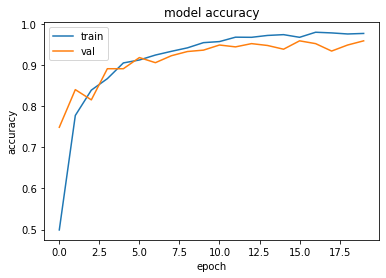

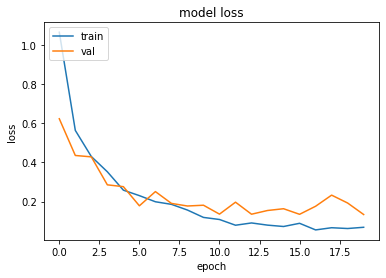

In [ ]:
# Gráfica Model Accuracy 
plt.plot(model_1.history['accuracy'])
plt.plot(model_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Gráfica Model Loss
plt.plot(model_1.history['loss'])
plt.plot(model_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Evaluación del modelo**

Para evaluar la capacidad de generalización y el rendimiento del modelo es necesario probarlo con los datos de prueba que no han sido vistos por la red anteriormente. De esta manera se obtuvo el siguiente resultado de accuracy.

In [ ]:
# Test model
# Load x_test_norm & y_test
x_test_norm = np.load(os.path.join(test_path,'x_test_norm.npy'))
y_test = np.load(os.path.join(test_path,'y_test_enc.npy'), allow_pickle=True)

In [ ]:
# Compiled model to evaluate with test data
model.evaluate(x_test_norm, y_test)

14/14 [==============================] - 1s 21ms/step - loss: 0.1628 - accuracy: 0.9381


[0.16279226541519165, 0.9380733966827393]

Un accuracy para los datos de prueba del 93.81% y un loss del 16.28%.

Se procede a guardar el modelo en Drive.

In [ ]:
# Save model
model.save(os.path.join(models_path, 'model1_93_81.h5'))

In [ ]:
tf.keras.backend.clear_session

<function keras.backend.clear_session>

Se carga el modelo para calcular métricas a partir de la matriz de confusión.

In [ ]:
#load the model
model_loaded = tf.keras.models.load_model(os.path.join(models_path, 'model1_93_81.h5'))

Matriz de Confusión

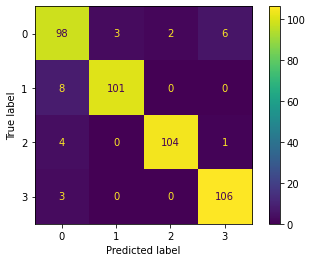

In [ ]:
preds = model_loaded.predict(x_test_norm)
cm = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
labels = ["0", "1", "2", "3"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot() 

In [ ]:
df = pd.DataFrame(data=cm, index=["0", "1", "2", "3"], columns=["0", "1", "2", "3"])

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = df.values.sum() - (FP + FN + TP) # necesito la cm como dataframe

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
metrics = np.array([FP,
          FN,
          TP,
          TN,
          TPR,
          TNR,
          PPV,
          NPV,
          FPR,
          FNR,
          FDR,
          ACC])

In [ ]:
df2 = pd.DataFrame(data=np.round(metrics,2), index=["FP", "FN", "TP", "TN", "TPR", "TNR", "PPV", "NPV", "FPR", "FNR", "FDR", "ACC"],
                   columns=["0", "1", "2", "3"])

In [ ]:
df2

,0,1,2,3
FP,15.00,3.00,2.00,7.00
FN,11.00,8.00,5.00,3.00
TP,98.00,101.00,104.00,106.00
TN,312.00,324.00,325.00,320.00
TPR,0.90,0.93,0.95,0.97
TNR,0.95,0.99,0.99,0.98
PPV,0.87,0.97,0.98,0.94
NPV,0.97,0.98,0.98,0.99
FPR,0.05,0.01,0.01,0.02
FNR,0.10,0.07,0.05,0.03


**Conclusión**

Se puede observar que el modelo es capaz de diferenciar entre la clase 'Cereal' y la clase 'Otros'. Además, diferencia entre las 3 marcas de cereal con un porcentaje de accuracy del 97%, 98%, y 98%, respectivamente.

El número de falsos positivos y negativos es de 54.

# Modelo 2

En este modelo se implementa EarlyStopping o Parada Temprana en casos en que el valor del loss en datos de validación no disminuye despúes de 8 épocas consecutivas. Así mismo, se implementa la reducción del learning rate con un factor de 0.1 en casos en que el valor del loss no disminuye despúes de 4 épocas consecutivas. 
Por otra parte, se aumentó el número de épocas a 30.

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)  
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)  
callbacks_list = [early_stop, reduce_lr]  

In [ ]:
# Compile model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# Fit and start training
model_2 = model.fit(x_train_norm, y_train, batch_size=60, epochs=30, 
                    validation_data=(x_val_norm,y_val), callbacks=callbacks_list)

Epoch 1/30
52/52 [==============================] - 15s 82ms/step - loss: 1.0459 - accuracy: 0.5023 - val_loss: 0.5734 - val_accuracy: 0.8111 - lr: 0.0010
Epoch 2/30
52/52 [==============================] - 3s 54ms/step - loss: 0.5543 - accuracy: 0.7860 - val_loss: 0.5878 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 3/30
52/52 [==============================] - 3s 49ms/step - loss: 0.4269 - accuracy: 0.8435 - val_loss: 0.2662 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 4/30
52/52 [==============================] - 3s 49ms/step - loss: 0.2854 - accuracy: 0.8883 - val_loss: 0.3549 - val_accuracy: 0.8337 - lr: 0.0010
Epoch 5/30
52/52 [==============================] - 3s 54ms/step - loss: 0.2825 - accuracy: 0.8994 - val_loss: 0.2750 - val_accuracy: 0.8993 - lr: 0.0010
Epoch 6/30
52/52 [==============================] - 3s 49ms/step - loss: 0.2154 - accuracy: 0.9088 - val_loss: 0.1840 - val_accuracy: 0.9276 - lr: 0.0010
Epoch 7/30
52/52 [==============================] - 3s 49ms/step - loss: 0.

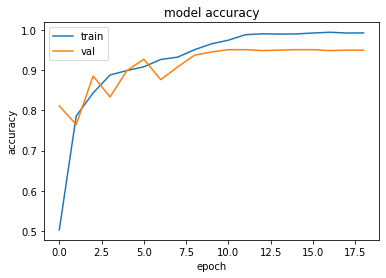

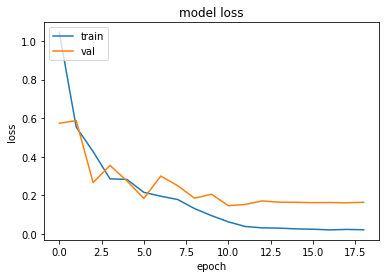

In [ ]:
# Gráfica Model Accuracy 
plt.plot(model_2.history['accuracy'])
plt.plot(model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Gráfica Model Loss
plt.plot(model_2.history['loss'])
plt.plot(model_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Load x_test_norm
x_test_norm = np.load(os.path.join(test_path,'x_test_norm.npy'))
y_test = np.load(os.path.join(test_path,'y_test_enc.npy'),allow_pickle=True)

In [ ]:
# Compiled model to evaluate with test data
model.evaluate(x_test_norm, y_test)

14/14 [==============================] - 1s 22ms/step - loss: 0.1535 - accuracy: 0.9472


[0.15352925658226013, 0.9472476840019226]

Se obtuvo un valor de accuracy para los datos de prueba del 94.72% y un loss del 15.35%. En comparación con el Modelo1 de la sección anterior, éste modelo tiene mejor rendimiento.

In [ ]:
# Save model
model.save(os.path.join(models_path, 'model2_94_72.h5'))

In [ ]:
#load the model
model_2 = tf.keras.models.load_model(os.path.join(models_path, 'model2_94_72.h5'))

Matriz de Confusión

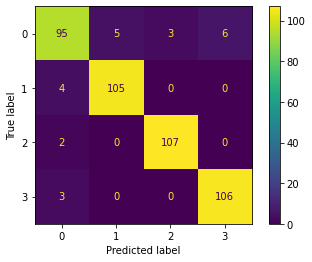

In [ ]:
preds = model_2.predict(x_test_norm)
cm = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
labels = ["0", "1", "2", "3"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot() 

In [ ]:
df = pd.DataFrame(data=cm, index=["0", "1", "2", "3"], columns=["0", "1", "2", "3"])

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = df.values.sum() - (FP + FN + TP) # necesito la cm como dataframe

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
metrics = np.array([FP,
          FN,
          TP,
          TN,
          TPR,
          TNR,
          PPV,
          NPV,
          FPR,
          FNR,
          FDR,
          ACC])

In [ ]:
df2 = pd.DataFrame(data=np.round(metrics,2), index=["FP", "FN", "TP", "TN", "TPR", "TNR", "PPV", "NPV", "FPR", "FNR", "FDR", "ACC"],
                   columns=["0", "1", "2", "3"])

In [ ]:
df2

,0,1,2,3
FP,9.00,5.00,3.00,6.00
FN,14.00,4.00,2.00,3.00
TP,95.00,105.00,107.00,106.00
TN,318.00,322.00,324.00,321.00
TPR,0.87,0.96,0.98,0.97
TNR,0.97,0.98,0.99,0.98
PPV,0.91,0.95,0.97,0.95
NPV,0.96,0.99,0.99,0.99
FPR,0.03,0.02,0.01,0.02
FNR,0.13,0.04,0.02,0.03


**Conclusión**

El Modelo2 es capaz de diferenciar entre la clase 'Cereal' y 'Otros' con un 95% de accuracy, y diferencia las 3 marcas de cereal con valores de accuracy de 98%, 99% y 98%, respectivamente.

El número de falsos positivos y falsos negativos es 46 en comparación con el Modelo1 que en total son 54.

# Modelo 3

Este modelo tiene más regularización. Se añadieron varias capas de Dropout al 50% desde la tercera capa convolucional. La arquitectura de la red sigue siendo la misma de AlexNet a excepción de las capas adicionales de Dropout.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, 11, strides=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Conv2D(32, 5, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 32)        11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0

In [ ]:
# Compile model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

Este modelo fue entrenado por un total de 20 épocas sin los callbacks de reducción de LR ni Early Stopping.

In [ ]:
# Fit and start training
model_3 = model.fit(x_train_norm, y_train, batch_size=60, epochs=20, 
                    validation_data=(x_val_norm,y_val))

Epoch 1/20
52/52 [==============================] - 22s 151ms/step - loss: 1.3950 - accuracy: 0.2519 - val_loss: 1.3867 - val_accuracy: 0.2500
Epoch 2/20
52/52 [==============================] - 3s 66ms/step - loss: 1.3874 - accuracy: 0.2497 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 3/20
52/52 [==============================] - 3s 67ms/step - loss: 1.3752 - accuracy: 0.2555 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 4/20
52/52 [==============================] - 3s 61ms/step - loss: 1.2007 - accuracy: 0.4045 - val_loss: 0.9513 - val_accuracy: 0.5373
Epoch 5/20
52/52 [==============================] - 3s 61ms/step - loss: 0.8621 - accuracy: 0.6169 - val_loss: 0.7157 - val_accuracy: 0.7636
Epoch 6/20
52/52 [==============================] - 3s 60ms/step - loss: 0.5245 - accuracy: 0.8065 - val_loss: 0.4930 - val_accuracy: 0.8360
Epoch 7/20
52/52 [==============================] - 3s 60ms/step - loss: 0.4130 - accuracy: 0.8542 - val_loss: 0.5013 - val_accuracy: 0.7749
Epoch 8/20


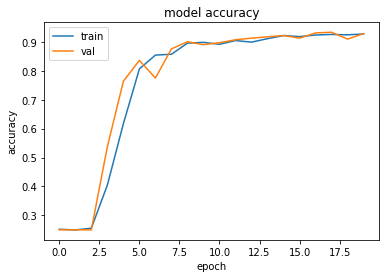

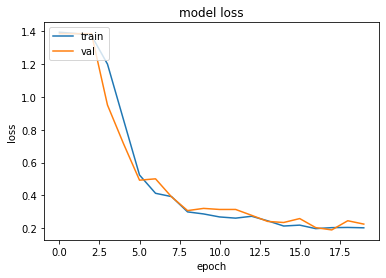

In [ ]:
# Gráfica Model Accuracy 
plt.plot(model_3.history['accuracy'])
plt.plot(model_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Gráfica Model Loss
plt.plot(model_3.history['loss'])
plt.plot(model_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Load test data
x_test_norm = np.load(os.path.join(test_path,'x_test_norm.npy'))
y_test = np.load(os.path.join(test_path,'y_test_enc.npy'),allow_pickle=True)

In [ ]:
# Compiled model to evaluate with test data
model.evaluate(x_test_norm, y_test)

14/14 [==============================] - 1s 19ms/step - loss: 0.2420 - accuracy: 0.9151


[0.24196051061153412, 0.9151375889778137]

Se obtuvo un valor de accuracy para los datos de prueba de 91.51% y un loss de 24.20%. Valores de rendimiento bajo comparados con los Modelos 1 y 2.

In [ ]:
# Model save
model.save(os.path.join(models_path,'model3_91_51.h5'))

In [ ]:
tf.keras.backend.clear_session

<function keras.backend.clear_session>

In [ ]:
#load the model
model_3 = tf.keras.models.load_model(os.path.join(models_path, 'model3_91_51.h5'))

Matriz de Confusión

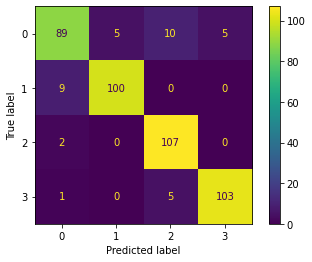

In [ ]:
preds = model_3.predict(x_test_norm)
cm = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
labels = ["0", "1", "2", "3"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot() 

In [ ]:
df = pd.DataFrame(data=cm, index=["0", "1", "2", "3"], columns=["0", "1", "2", "3"])

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = df.values.sum() - (FP + FN + TP) # necesito la cm como dataframe

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
metrics = np.array([FP,
          FN,
          TP,
          TN,
          TPR,
          TNR,
          PPV,
          NPV,
          FPR,
          FNR,
          FDR,
          ACC])

In [ ]:
df2 = pd.DataFrame(data=np.round(metrics,2), index=["FP", "FN", "TP", "TN", "TPR", "TNR", "PPV", "NPV", "FPR", "FNR", "FDR", "ACC"],
                   columns=["0", "1", "2", "3"])

In [ ]:
df2

,0,1,2,3
FP,12.00,5.00,15.00,5.00
FN,20.00,9.00,2.00,6.00
TP,89.00,100.00,107.00,103.00
TN,315.00,322.00,312.00,322.00
TPR,0.82,0.92,0.98,0.94
TNR,0.96,0.98,0.95,0.98
PPV,0.88,0.95,0.88,0.95
NPV,0.94,0.97,0.99,0.98
FPR,0.04,0.02,0.05,0.02
FNR,0.18,0.08,0.02,0.06


**Conclusión**

A partir de la matriz de confusión se puede observar que el número de falsos positivos y negativos aumentó drásticamente a 69. La categoría 'Otros' es clasificada por la red con un porcentaje de accuracy del 93% y la capacidad de diferenciación entre las 3 marcas de cereales disminuyó en comparación a los anteriores modelos: con valores de accuracy del 97%, 96% y 97%, respectivamente.

# Modelo 4

En este modelo se conserva la misma arquitectura del Modelo3. La diferencia se encuentra en la implementación de Early Stopping y de la reducción del Learning Rate en casos en los que el valor de loss con los datos de validación no cambie después de 8 y 4 épocas consecutivas, respectivamente.

También, el entrenamiento se realizó durante 30 épocas.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, 11, strides=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Conv2D(32, 5, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(3,strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 32)        11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0

In [ ]:
# Compile model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)  
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)  
callbacks_list = [early_stop, reduce_lr]  

In [ ]:
# Fit and start training
model_4 = model.fit(x_train_norm, y_train, batch_size=60, epochs=30, 
                    validation_data=(x_val_norm,y_val), callbacks=callbacks_list)

Epoch 1/30
52/52 [==============================] - 7s 68ms/step - loss: 1.3256 - accuracy: 0.3081 - val_loss: 1.2288 - val_accuracy: 0.4423 - lr: 0.0010
Epoch 2/30
52/52 [==============================] - 3s 49ms/step - loss: 1.0208 - accuracy: 0.5539 - val_loss: 1.2027 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 3/30
52/52 [==============================] - 3s 48ms/step - loss: 0.7002 - accuracy: 0.7107 - val_loss: 1.0345 - val_accuracy: 0.5124 - lr: 0.0010
Epoch 4/30
52/52 [==============================] - 3s 49ms/step - loss: 0.4960 - accuracy: 0.8179 - val_loss: 0.8722 - val_accuracy: 0.6143 - lr: 0.0010
Epoch 5/30
52/52 [==============================] - 3s 49ms/step - loss: 0.4206 - accuracy: 0.8455 - val_loss: 0.4235 - val_accuracy: 0.8473 - lr: 0.0010
Epoch 6/30
52/52 [==============================] - 3s 54ms/step - loss: 0.3554 - accuracy: 0.8682 - val_loss: 0.3298 - val_accuracy: 0.8857 - lr: 0.0010
Epoch 7/30
52/52 [==============================] - 3s 49ms/step - loss: 0.2

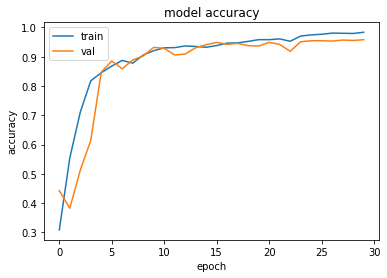

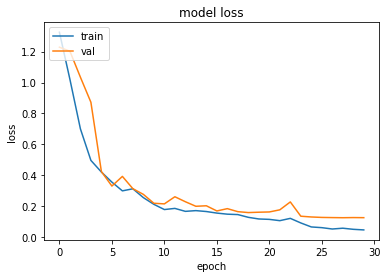

In [ ]:
# Gráfica Model Accuracy 
plt.plot(model_4.history['accuracy'])
plt.plot(model_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Gráfica Model Loss
plt.plot(model_4.history['loss'])
plt.plot(model_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Load test data
x_test_norm = np.load(os.path.join(test_path,'x_test_norm.npy'))
y_test = np.load(os.path.join(test_path,'y_test_enc.npy'),allow_pickle=True)

In [ ]:
# Compiled model to evaluate with test data
model.evaluate(x_test_norm, y_test)

14/14 [==============================] - 0s 18ms/step - loss: 0.1170 - accuracy: 0.9564


[0.11701086908578873, 0.9564220309257507]

Se obtuvo un valor de accuracy para los datos de prueba del 95.64% y un loss del 11.70%. Valores que superan a los modelos anteriormente implementados. 

In [ ]:
# Model save
model.save(os.path.join(models_path,'model4_95_64.h5'))

In [ ]:
#load the model
model_4 = tf.keras.models.load_model(os.path.join(models_path, 'model4_95_64.h5'))

Matriz de Confusión

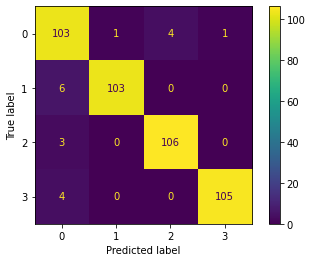

In [ ]:
preds = model_4.predict(x_test_norm)
cm = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))
labels = ["0", "1", "2", "3"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot() 

In [ ]:
df = pd.DataFrame(data=cm, index=["0", "1", "2", "3"], columns=["0", "1", "2", "3"])

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = df.values.sum() - (FP + FN + TP) # necesito la cm como dataframe

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
metrics = np.array([FP,
          FN,
          TP,
          TN,
          TPR,
          TNR,
          PPV,
          NPV,
          FPR,
          FNR,
          FDR,
          ACC])

In [ ]:
df2 = pd.DataFrame(data=np.round(metrics,2), index=["FP", "FN", "TP", "TN", "TPR", "TNR", "PPV", "NPV", "FPR", "FNR", "FDR", "ACC"],
                   columns=["0", "1", "2", "3"])

In [ ]:
df2

,0,1,2,3
FP,13.00,1.00,4.00,1.00
FN,6.00,6.00,3.00,4.00
TP,103.00,103.00,106.00,105.00
TN,314.00,326.00,323.00,326.00
TPR,0.94,0.94,0.97,0.96
TNR,0.96,1.00,0.99,1.00
PPV,0.89,0.99,0.96,0.99
NPV,0.98,0.98,0.99,0.99
FPR,0.04,0.00,0.01,0.00
FNR,0.06,0.06,0.03,0.04


**Conclusión** 

A partir de la matriz de confusión se puede observar que el número de falsos positivos y falsos negativos es de 38. El valor más pequeño obtenido entre los 4 modelos de red neuronal implementados. 

Se observa que el accuracy con que reconoce la clase 'Otros' es de 96%, valor más alto comparado con los otros modelos (M1:94%, M2:95%, M3:93%). Además, el valor de accuracy con que diferencia las 3 marcas de cereal es de 98%, 98% y 99%, respectivamente.

Este modelo final es el que se escogió para presentar a la prueba técnica.